In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
#ruta = "/home/sear/Documentos/proyecto_frecuencias/Analisis_de_Frecuencias/gastos/datos2014.csv" # Linux
ruta = r"C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\gastos\datos2014.csv"  # Estupido windows
print(f" \nRuta --> {ruta}")

 
Ruta --> C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\gastos\datos2014.csv


In [3]:
datos = pd.read_csv(ruta, header=None).values
datos.astype(float)
print(type(datos))
len(datos)

<class 'numpy.ndarray'>


62

In [4]:
m = datos.size
media = np.mean(datos)
desv_est =  np.std(datos, ddof=1)

In [5]:
matriz01 = np.zeros ((m, 6))
matriz02 = np.zeros ((m, 4))
matriz02 [:] = -999
matriz02 [0, 0] = 2
matriz02 [1, 0] = 5
matriz02 [2, 0] = 10
matriz02 [3, 0] = 20
matriz02 [4, 0] = 50
matriz02 [5, 0] = 100
matriz02 [6, 0] = 200
matriz02 [7, 0] = 500
matriz02 [8, 0] = 1000
matriz02 [9, 0] = 2000
matriz02 [10, 0] = 5000
matriz02 [11, 0] = 10000
EEstandart = np.full((m, 2), -999, float)

In [6]:
for i in range (m):
    matriz01 [i, 0] = i + 1           # Se crea la columna con el No de orden columna '1'
    matriz01 [i, 1] = datos.max()  # Se crea la columna con los gastos "columna 2"
    j = datos.argmax()             # registrados y ordenados
    datos [j, 0] = -1              # en orden ascendente
    matriz01 [i, 2] = (m + 1) / matriz01 [i, 0]  # Se crea la columna con Tr
    matriz01 [i, 3] = 1 - (1 / matriz01 [i, 2])  # Se crea la columna de F(x), "a partir de Tr"

In [7]:
beta = media - (0.45 * desv_est)
alfa = desv_est * ((6 ** 0.5) / math.pi)

In [8]:
lambda1 = media      # alfa = media = M0
suma = 0.0
for i in range (m):                   # M1 = (1/n(n-1))*suma(xi*n-i)
    M1 = matriz01[i, 1] * (m-(i+1))
    suma = suma + M1  
M1 = suma/(m*(m-1))
lambda2 = (2*M1)-media
        
alfaMl = lambda2/math.log(2)          # alfa momentos-L
betaMl = lambda1 - (0.577216*alfaMl)  # beta momentos-L

In [9]:
                        # Para el método de momentos
                        
EEMom = 0.0
for i in range (m):
    matriz01 [i, 4] = beta - (alfa * np.log(-np.log(matriz01 [i, 3])))
    prueba = (matriz01 [i, 1] - matriz01 [i, 4]) ** 2
    EEMom = EEMom + prueba

EEMom = (EEMom / (m - 2)) ** 0.5  # Se estima el error estandart para dos parametros
print ('Distribución Gumbel, error estandart (momentos): ', EEMom)
        
                        # Para el método de momentos-L
                        
EEMomL = 0.0
for i in range (m):
    matriz01 [i, 5] = betaMl - (alfaMl * np.log(-np.log(matriz01 [i, 3])))
    prueba = (matriz01 [i, 1] - matriz01 [i, 5]) ** 2
    EEMomL = EEMomL + prueba
        
EEMomL = (EEMomL / (m - 2)) ** 0.5  # Se estima el error estandart para dos parametros
print ('Distribución Gumbel, error estandart (momentos_L): ', EEMomL)
EEstandart[0, 0] = EEMom
EEstandart[0, 1] = EEMomL

Distribución Gumbel, error estandart (momentos):  1278.3284288597074
Distribución Gumbel, error estandart (momentos_L):  1304.618961808627


In [10]:
# Se llena la matriz02
#********************************************************************************************
        
n = 12
for i in range (n):
    matriz02 [i ,1] = 1.0 - (1.0 / matriz02 [i, 0]) #Columna de F(x)
            
                        # Valores extrapolados
                        # Momentos
                        
    matriz02 [i, 2] = beta - (alfa * np.log(-np.log(matriz02 [i, 1])))
            
                        # Momentos-L
                        
    matriz02 [i, 3] = betaMl - (alfaMl * np.log(-np.log(matriz02 [i, 1])))

In [11]:
columnas = ['No Orden', 'Gastos Registrados', 'Tr (Anios)', 'F(x)', 'Valor Ajustado (Momentos)', 'Valor Ajustado (Momentos-L)']
cD = pd.DataFrame(matriz01, columns = columnas)
        
cD.insert(6, 'Tr', matriz02 [:, 0])
cD.insert(7, 'F(X)', matriz02 [:, 1])
cD.insert(8, 'Valor Extrapolado (Momentos)', matriz02 [:, 2])
cD.insert(9, 'Valor Extrapolado (Momentos-L)', matriz02[:, 3])
cD.insert(10, 'Error Estandart "Momentos"', EEstandart[:, 0])
cD.insert(11, 'Error Estandart "Momentos-L"', EEstandart[:, 1])

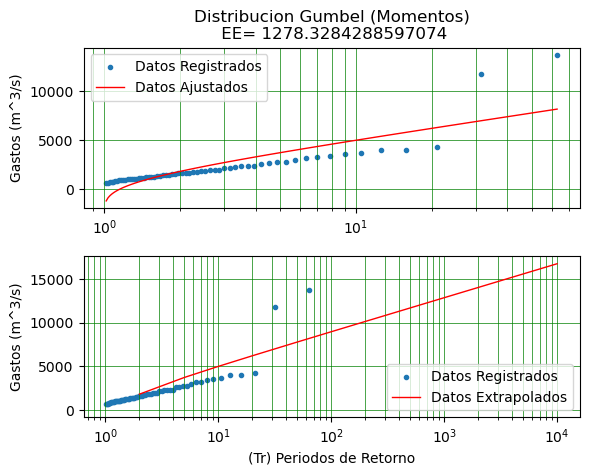

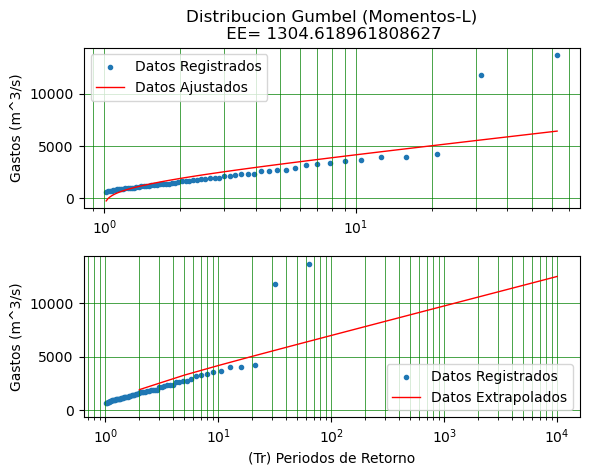

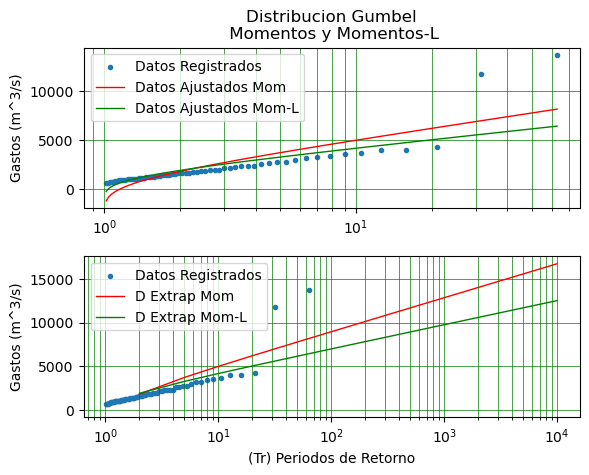

In [12]:
#*********************** * ********************************************************************
# Graficos
#********************************************************************************************
titulo0 = "Distribucion Gumbel (Momentos)\n EE= " + str(EEMom)
titulo1 = "Distribucion Gumbel (Momentos-L)\n EE= " + str(EEMomL)

tR = matriz01 [:, 2]
dReg = matriz01 [:, 1]
dAjustMom = matriz01 [:, 4]
dAjustMax = matriz01 [:, 5]
dExtrapMom = matriz02 [:12, 2]
dExtrapMax = matriz02 [:12, 3]
dTrExtrap = matriz02 [:12, 0]

#*********************** * ********************************************************************
        
pl.subplot(2,1,1)
pl.subplots_adjust(hspace=0.3)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(tR, dAjustMom, color="r", linewidth="1.0", linestyle="-", label ="Datos Ajustados")
pl.legend(loc="best")
pl.title(titulo0)
pl.ylabel("Gastos (m^3/s)")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)
        
pl.subplot(2,1,2)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(dTrExtrap, dExtrapMom, color="r", linewidth="1.0", linestyle="-", label ="Datos Extrapolados")
pl.legend(loc="best")
pl.ylabel("Gastos (m^3/s)")
pl.xlabel("(Tr) Periodos de Retorno")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)
        
#pl.savefig("salidas/GumbelMom.png", dpi=1200)
pl.show()
        
        #*********************** * ********************************************************************
        
pl.subplot(2,1,1)
pl.subplots_adjust(hspace=0.3)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(tR, dAjustMax, color="r", linewidth="1.0", linestyle="-", label ="Datos Ajustados")
pl.legend(loc="best")
pl.title(titulo1)
pl.ylabel("Gastos (m^3/s)")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)

pl.subplot(2,1,2)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(dTrExtrap, dExtrapMax, color="r", linewidth="1.0", linestyle="-", label ="Datos Extrapolados")
pl.legend(loc="best")
pl.ylabel("Gastos (m^3/s)")
pl.xlabel("(Tr) Periodos de Retorno")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)

#pl.savefig("salidas/GumbelMom-L.png", dpi=1200)
pl.show()
        
#*********************** * ********************************************************************

pl.subplot(2,1,1)
pl.subplots_adjust(hspace=0.3)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(tR, dAjustMom, color="r", linewidth="1.0", linestyle="-", label ="Datos Ajustados Mom")
pl.plot(tR, dAjustMax, color="g", linewidth="1.0", linestyle="-", label ="Datos Ajustados Mom-L")
pl.legend(loc="best")
pl.title("Distribucion Gumbel\n Momentos y Momentos-L")
pl.ylabel("Gastos (m^3/s)")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)
        
pl.subplot(2,1,2)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(dTrExtrap, dExtrapMom, color="r", linewidth="1.0", linestyle="-", label ="D Extrap Mom")
pl.plot(dTrExtrap, dExtrapMax, color="g", linewidth="1.0", linestyle="-", label ="D Extrap Mom-L")
pl.legend(loc="best")
pl.ylabel("Gastos (m^3/s)")
pl.xlabel("(Tr) Periodos de Retorno")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)

#pl.savefig("salidas/GumbelMomMom-L.png", dpi=1200)
pl.show()

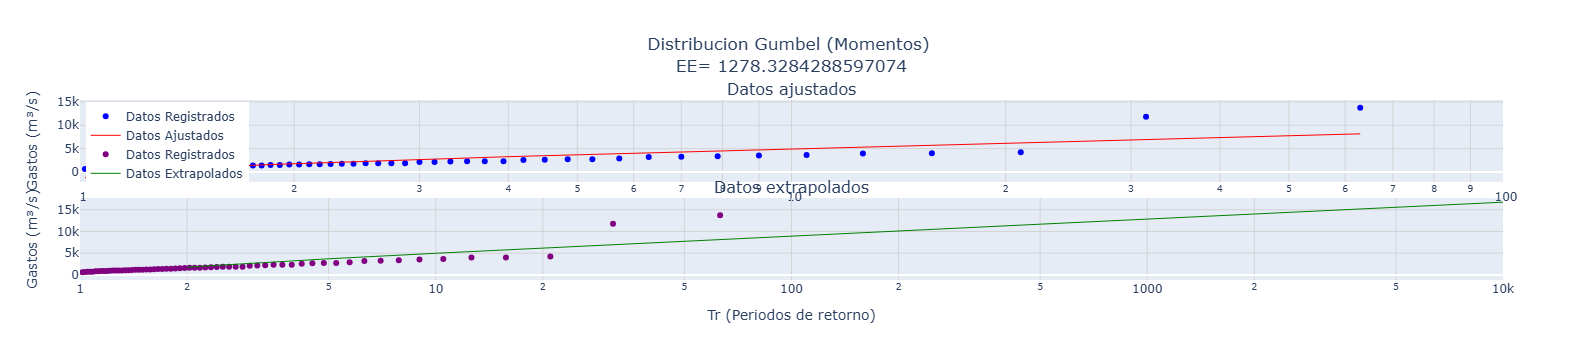

In [31]:
# Gráficos html Momentos
# Crear subplots
titulo0 = "Distribucion Gumbel (Momentos) <br>EE= " + str(EEMom)
titulo1 = "Distribucion Gumbel (Momentos-L). EE= " + str(EEMomL)
fig = make_subplots(rows=2, 
                    cols=1, 
                    shared_xaxes=False, 
                    vertical_spacing=0.09, 
                    subplot_titles=("Datos ajustados", "Datos extrapolados"))
# Gráfico 1: Datos Registrados (Scatter) y Datos Ajustados (Línea)
fig.add_trace(go.Scatter(x=tR, 
                         y=dReg, 
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='blue')), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=tR, 
                         y=dAjustMom, 
                         mode='lines', 
                         name='Datos Ajustados', 
                         line=dict(color='red', width=1)), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=tR, 
                         y=dReg,
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='purple')), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrapMom, 
                         mode='lines', 
                         name='Datos Extrapolados', 
                         line=dict(color='green', 
                         width=1)), 
              row=2, col=1)

# Configurar el layout
fig.update_layout(
    title_text=titulo0,
    title_x=0.5,  # Centra el título
    #xaxis_type="log",  # Eje x semilogarítmico
    #yaxis_title="Gastos (m³/s)",
    showlegend=True,
    legend=dict(x=0.004, y=0.99))

# Configurar ambos ejes x como logarítmicos
fig.update_xaxes(type="log", 
                 range=[0, 2], 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)  # Eje x de la primera fila
fig.update_xaxes(type="log", 
                 range=[0, 4], 
                 title="Tr (Periodos de retorno)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)  # Eje x de la segunda fila
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)

fig.show()

In [32]:
fig.write_html(r'C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\salidas\grafico_plotly_gumbel_mom.html')

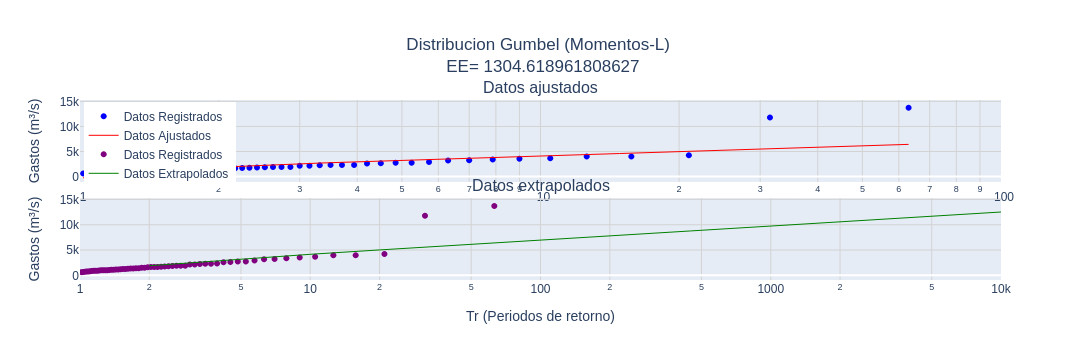

In [34]:
# Gráficos html Momentos L
# Crear subplots
#titulo0 = "Distribucion Gumbel (Momentos) <br>EE= " + str(EEMom)
titulo1 = "Distribucion Gumbel (Momentos-L) <br> EE= " + str(EEMomL)
fig = make_subplots(rows=2, 
                    cols=1, 
                    shared_xaxes=False, 
                    vertical_spacing=0.09, 
                    subplot_titles=("Datos ajustados", "Datos extrapolados"))
# Gráfico 1: Datos Registrados (Scatter) y Datos Ajustados (Línea)
fig.add_trace(go.Scatter(x=tR, 
                         y=dReg, 
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='blue')), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=tR, 
                         y=dAjustMax, 
                         mode='lines', 
                         name='Datos Ajustados', 
                         line=dict(color='red', width=1)), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=tR, 
                         y=dReg,
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='purple')), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrapMax, 
                         mode='lines', 
                         name='Datos Extrapolados', 
                         line=dict(color='green', 
                         width=1)), 
              row=2, col=1)

# Configurar el layout
fig.update_layout(
    title_text=titulo1,
    title_x=0.5,  # Centra el título
    #xaxis_type="log",  # Eje x semilogarítmico
    #yaxis_title="Gastos (m³/s)",
    showlegend=True,
    legend=dict(x=0.004, y=0.99)) # posición de la leyenda

# Configurar ambos ejes x como logarítmicos
fig.update_xaxes(type="log", 
                 range=[0, 2], 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)  # Eje x de la primera fila
fig.update_xaxes(type="log", 
                 range=[0, 4], 
                 title="Tr (Periodos de retorno)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)  # Eje x de la segunda fila
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)

fig.show()

In [35]:
fig.write_html(r'C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\salidas\grafico_plotly_gumbel_momL.html')

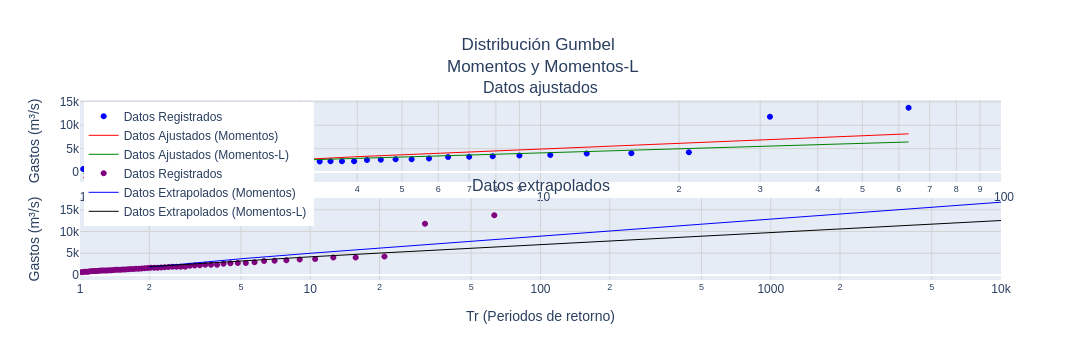

In [40]:
# Gráficos html, comparación
# Crear subplots
#titulo0 = "Distribucion Gumbel (Momentos) <br>EE= " + str(EEMom)
#titulo1 = "Distribucion Gumbel (Momentos-L) <br> EE= " + str(EEMomL)
fig = make_subplots(rows=2, 
                    cols=1, 
                    shared_xaxes=False, 
                    vertical_spacing=0.09, 
                    subplot_titles=("Datos ajustados", "Datos extrapolados"))
# Gráfico 1: Datos Registrados (Scatter) y Datos Ajustados (Línea)
fig.add_trace(go.Scatter(x=tR, 
                         y=dReg, 
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='blue')), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=tR, 
                         y=dAjustMom, 
                         mode='lines', 
                         name='Datos Ajustados (Momentos)', 
                         line=dict(color='red', width=1)), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=tR, 
                         y=dAjustMax, 
                         mode='lines', 
                         name='Datos Ajustados (Momentos-L)', 
                         line=dict(color='green', width=1)), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=tR, 
                         y=dReg,
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='purple')), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrapMom, 
                         mode='lines', 
                         name='Datos Extrapolados (Momentos)', 
                         line=dict(color='blue', 
                         width=1)), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrapMax, 
                         mode='lines', 
                         name='Datos Extrapolados (Momentos-L)', 
                         line=dict(color='black', 
                         width=1)), 
              row=2, col=1)

# Configurar el layout
fig.update_layout(
    title_text="Distribución Gumbel <br> Momentos y Momentos-L",
    title_x=0.5,  # Centra el título
    #xaxis_type="log",  # Eje x semilogarítmico
    #yaxis_title="Gastos (m³/s)",
    showlegend=True,
    legend=dict(x=0.004, y=0.99)) # posición de la leyenda

# Configurar ambos ejes x como logarítmicos
fig.update_xaxes(type="log", 
                 range=[0, 2], 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)  # Eje x de la primera fila
fig.update_xaxes(type="log", 
                 range=[0, 4], 
                 title="Tr (Periodos de retorno)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)  # Eje x de la segunda fila
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)

fig.show()

In [41]:
fig.write_html('/home/sear/Documentos/repos_git/analisis_frec/Analisis_de_Frecuencias/cuadernos/salidas_notebooks/grafico_plotly_gumbel_comparacion.html')